# <h1>Influence of Employment on Price of Houses</h1>

<div class="usecase-authors"><b>Authored by: </b> Daljeet Kaur</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

# **<div class="usecase-section-header">Scenario</div>**

In the bustling city of Melbourne, urban planners and policymakers are eager to gain insights into the intricate relationship between employment trends and the housing market. Leveraging the City of Melbourne's Census of Land Use and Employment (CLUE) dataset, they embark on a mission to explore this dynamic. Specifically, they focus on the "Jobs per ANZSIC for blocks" dataset, which offers detailed employment data across various industries and geographical areas, to uncover correlations with housing prices in different neighborhoods.

As I analyze the data, patterns start to emerge, revealing that certain industries, such as technology and finance, have a significant influence on local housing prices, driving up demand and property values. Conversely, fluctuations in employment within other industries may have a lesser impact or even show a negative correlation with housing prices.

These insights provide urban planners with a deeper understanding of the factors influencing Melbourne's housing market. Armed with data-driven evidence, I can help refine urban development strategies to foster economic growth, maintain housing affordability, and create vibrant, sustainable communities for Melbourne's residents.

# <div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- You plan to learn how to merge and clean datasets from various sources, ensuring data consistency for accurate analysis. Through Exploratory Data Analysis, You will understand the data's structure, identify patterns, and uncover relationships between variables.

You aim to gain experience in assessing the correlation between employment trends across different industries and house prices in various areas, using statistical techniques. This use case will allow you to apply statistical methods such as hypothesis testing and regression analysis to draw meaningful conclusions.

Additionally, You plan to upskill by exploring machine learning algorithms to predict house prices based on employment data and other factors, deepening my understanding of predictive modeling techniques.

By analyzing the impact of employment on housing prices, You will gain insights into urban planning considerations and the economic dynamics of Melbourne's neighborhoods.

# **<div class="usecase-section-header">INTRODUCTION</div>**

In this project, I will analyze the relationship between employment trends and housing prices within the City of Melbourne. By examining datasets provided by the city, my goal is to understand how fluctuations in employment across different industries impact the housing market. This analysis is crucial for urban planning and economic development within Melbourne. The datasets include information on employment levels categorized by industry (ANZSIC codes) and housing prices by small area.

Employment patterns significantly influence housing demand and property prices. Changes in employment levels within specific industries can lead to shifts in population demographics, housing preferences, and overall market dynamics. Understanding these correlations is vital for urban planners and stakeholders to make informed decisions about housing affordability, workforce development, and infrastructure planning.

Through this project, I aim to uncover insights into the relationship between employment and housing markets. By leveraging data science techniques, statistical analysis, and machine learning algorithms, I hope to identify patterns, trends, and correlations that can guide strategic decision-making. Ultimately, my goal is to contribute to the creation of smarter cities, gain deeper insights into urban dynamics, identify areas for improvement, and develop innovative solutions to foster inclusive and resilient communities.



# Dataset List
Jobs per ANZSIC for blocks

House Prices by Small Area - Sale Year

# **Contents**

Import important Libraries

Connect, Test and Analysis of Datasets

In [ ]:
# Standard
import os
import json
import io
# Data import
import requests

# Data manipulation
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVR
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
def download_and_load_csv(url):
    response = requests.get(url)
    csv_string = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_string))
    return df

# API Link
download_link_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/employment-by-block-by-anzsic/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

# Use functions to download and load data
df = download_and_load_csv(download_link_1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Census year                                      12394 non-null  int64  
 1   Block ID                                         12394 non-null  int64  
 2   CLUE small area                                  12394 non-null  object 
 3   Accommodation and Food Services                  9554 non-null   float64
 4   Administrative and Support Services              10373 non-null  float64
 5   Agriculture, Forestry and Fishing                12099 non-null  float64
 6   Arts and Recreation Services                     8465 non-null   float64
 7   Construction                                     10319 non-null  float64
 8   Education and Training                           9841 non-null   float64
 9   Electricity, Gas, Water and 

In [ ]:
display(df)

,Census year,Block ID,CLUE small area,Accommodation and Food Services,Administrative and Support Services,"Agriculture, Forestry and Fishing",Arts and Recreation Services,Construction,Education and Training,"Electricity, Gas, Water and Waste Services",...,Manufacturing,Mining,Other Services,"Professional, Scientific and Technical Services",Public Administration and Safety,"Rental, Hiring and Real Estate Services",Retail Trade,"Transport, Postal and Warehousing",Wholesale Trade,Total jobs in block
0,2018,1101,Docklands,565.0,38.0,0.0,6.0,0.0,0.0,2092.0,...,NaN,0.0,209.0,0.0,NaN,54.0,878.0,632.0,0.0,6970.0
1,2018,1107,Docklands,NaN,0.0,0.0,5.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,126.0
2,2018,1109,Docklands,437.0,170.0,NaN,3.0,37.0,27.0,NaN,...,NaN,0.0,108.0,433.0,11.0,142.0,60.0,118.0,48.0,1758.0
3,2018,1110,Docklands,203.0,NaN,0.0,246.0,62.0,NaN,NaN,...,NaN,0.0,25.0,NaN,0.0,21.0,610.0,0.0,0.0,2118.0
4,2018,1111,West Melbourne (Industrial),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,0.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2018,87,Melbourne (CBD),211.0,NaN,0.0,NaN,NaN,54.0,NaN,...,NaN,0.0,17.0,848.0,0.0,26.0,0.0,0.0,NaN,5447.0
12390,2018,88,Melbourne (CBD),NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,46.0
12391,2018,92,West Melbourne (Residential),0.0,0.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
12392,2018,93,Melbourne (CBD),115.0,NaN,0.0,NaN,0.0,36.0,0.0,...,0.0,0.0,148.0,508.0,NaN,44.0,NaN,0.0,0.0,2168.0


In [ ]:
df.drop(["Block ID","Accommodation and Food Services","Administrative and Support Services","Agriculture, Forestry and Fishing","Arts and Recreation Services",
         "Construction","Education and Training","Electricity, Gas, Water and Waste Services","Financial and Insurance Services","Health Care and Social Assistance",
         "Information Media and Telecommunications","Manufacturing","Mining","Other Services","Professional, Scientific and Technical Services","Public Administration and Safety",
         "Rental, Hiring and Real Estate Services","Retail Trade","Transport, Postal and Warehousing","Wholesale Trade"
       ], axis=1, inplace=True)

In [ ]:
df3 = pd.DataFrame(df)

# Convert 'Census year' column to datetime format
df3['Census year'] = pd.to_datetime(df3['Census year'], format='%Y')

# Filter data to keep only years till 2016
df_filtered = df3[df3['Census year'].dt.year <= 2016]

# Print the filtered DataFrame
display(df_filtered)

,Census year,CLUE small area,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
11577,2002-01-01,West Melbourne (Industrial),55.0
11578,2014-01-01,City of Melbourne (total),447074.0
11579,2012-01-01,City of Melbourne (total),436436.0
11580,2009-01-01,City of Melbourne (total),415487.0


In [ ]:
df5 = pd.DataFrame(df_filtered)

# Filter data to keep only rows where 'CLUE small area' is neither 'City of Melbourne' nor 'West Melbourne (Residential)'
df_filtered2 = df5[~df5['CLUE small area'].isin(['City of Melbourne (total)', 'West Melbourne (Industrial)'])]

# Print the filtered DataFrame
print(df_filtered2)

      Census year  CLUE small area  Total jobs in block
215    2016-01-01  Melbourne (CBD)                 15.0
216    2016-01-01  Melbourne (CBD)                718.0
217    2016-01-01  Melbourne (CBD)               4572.0
218    2016-01-01  Melbourne (CBD)               3991.0
219    2016-01-01  Melbourne (CBD)               2168.0
...           ...              ...                  ...
11570  2002-01-01        Parkville               4426.0
11573  2002-01-01       Kensington                  3.0
11574  2002-01-01        Docklands                  0.0
11575  2002-01-01        Docklands               1825.0
11576  2002-01-01        Docklands                  NaN

[8547 rows x 3 columns]


In [ ]:
# Rename columns
melbourne_job = df_filtered2.rename(columns={"Census year": "Year",
                                  "CLUE small area": "Region"})

In [ ]:
display(melbourne_job)

,Year,Region,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
11570,2002-01-01,Parkville,4426.0
11573,2002-01-01,Kensington,3.0
11574,2002-01-01,Docklands,0.0
11575,2002-01-01,Docklands,1825.0


In [ ]:
melbourne_job.shape

(8547, 3)

Checking and Handling missing values.

**Jobs per ANZSIC for blocks**

In [ ]:
# Check for missing values in the melbourne_job DataFrame
melbourne_job.isna().sum()

,0
Year,0
Region,0
Total jobs in block,1905


In [ ]:
# Remove rows with missing values from the melbourne_job DataFrame
melbourne_job.dropna(inplace = True)


In [ ]:
melbourne_job.isna().sum()

,0
Year,0
Region,0
Total jobs in block,0


In [ ]:
# data set name
download_link_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/house-prices-by-small-area-sale-year/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

df1 = download_and_load_csv(download_link_2)

In [ ]:
df7 = pd.DataFrame(df1)

df_filtered4 = df7[df7['Small_Area'] != 'NA']

# Print the resulting DataFrame
print(df_filtered4)

     Sale_Year       Small_Area                   Type  Median_Price  \
0         2000          Carlton        House/Townhouse      316250.0   
1         2000          Carlton  Residential Apartment      220000.0   
2         2000   East Melbourne        House/Townhouse      622500.0   
3         2000   East Melbourne  Residential Apartment      295000.0   
4         2000       Kensington        House/Townhouse      215250.0   
..         ...              ...                    ...           ...   
342       2016  North Melbourne  Residential Apartment      515000.0   
343       2016        Parkville        House/Townhouse     1761250.0   
344       2016        Parkville  Residential Apartment      500000.0   
345       2016      South Yarra        House/Townhouse     2135000.0   
346       2016        Southbank  Residential Apartment      565000.0   

     Transaction_Count  
0                  116  
1                  309  
2                   42  
3                  139  
4         

In [ ]:
df_filtered4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale_Year          347 non-null    int64  
 1   Small_Area         340 non-null    object 
 2   Type               347 non-null    object 
 3   Median_Price       319 non-null    float64
 4   Transaction_Count  347 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB


In [ ]:
df_filtered4.head()

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


In [ ]:
# Check for missing values in the df_filtered4 DataFrame
df_filtered4.isnull().any()


,0
Sale_Year,False
Small_Area,True
Type,False
Median_Price,True
Transaction_Count,False


In [ ]:
# Check for missing values in the df_filtered4 DataFrame
df_filtered4.isna().sum()

,0
Sale_Year,0
Small_Area,7
Type,0
Median_Price,28
Transaction_Count,0


In [ ]:
# Remove rows with missing values from the df_filtered4 DataFrame
df_filtered4.dropna(inplace = True)

In [ ]:
df_filtered4.isna().sum()

,0
Sale_Year,0
Small_Area,0
Type,0
Median_Price,0
Transaction_Count,0


In [ ]:
df_filtered4.isnull().any()

,0
Sale_Year,False
Small_Area,False
Type,False
Median_Price,False
Transaction_Count,False


In [ ]:
# Rename columns
houseprice_melbourne = df_filtered4.rename(columns={"Sale_Year": "Year",
                                  "Small_Area": "Region","Type":"House_type","Median_price":"House_price",})

In [ ]:
# Check duplicate rows
houseprice_melbourne[houseprice_melbourne.duplicated()]

,Year,Region,House_type,Median_Price,Transaction_Count


In [ ]:
houseprice_melbourne.drop_duplicates(inplace=True)

The above code performs several data processing and cleaning steps on a dataset House Prices by Small Area - Sale Year and by importing necessary libraries and download_and_load_csv function s then used to download data from a specific API link related to house prices by small area in Melbourne.After craeting a dataframe we filter out rows where the 'Small_Area' column is not equal to 'NA' using boolean indexing and the Missing values are checked, dropped, and checked again, Columns are renamed to improve clarity and consistency and The code checks for duplicate rows in the DataFrame based on all columns and if any duplicates are found, they are dropped from the DataFrame.


(EDA) - Exploratory Data Analysis for Jobs per ANZSIC for blocks and House Prices by Small Area - Sale Year

In [ ]:
melbourne_job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 215 to 11575
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 6642 non-null   datetime64[ns]
 1   Region               6642 non-null   object        
 2   Total jobs in block  6642 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 207.6+ KB


Now lets analyze the distribution and outliers in the "Total jobs in block" column of the melbourne_job DataFrame.

<ipython-input-28-1c23928f2ceb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_job["Total jobs in block"], fit=norm)


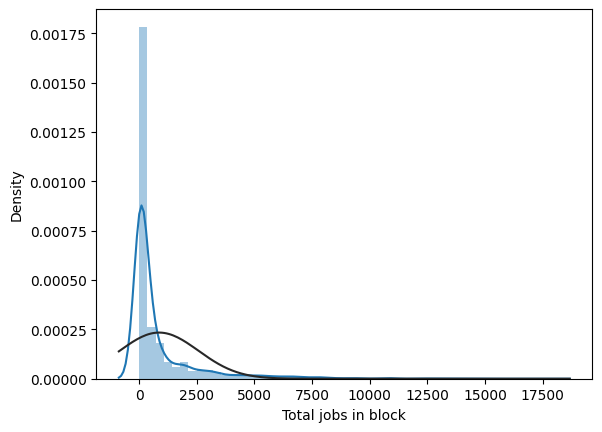

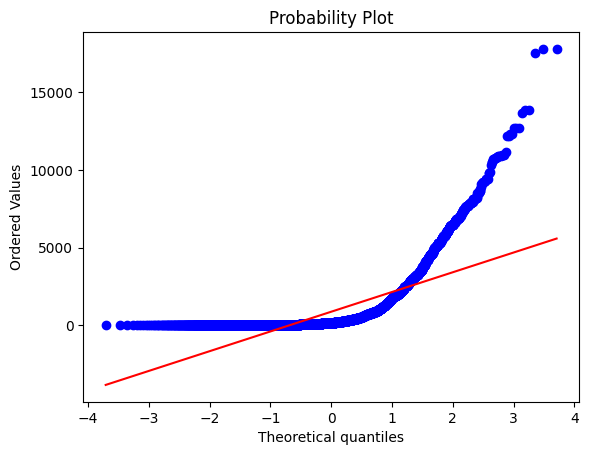

In [ ]:
#Add headers before each part/chart so that the user can follow easier
sns.distplot(melbourne_job["Total jobs in block"], fit=norm)
fig = plt.figure()
prob = stats.probplot(melbourne_job["Total jobs in block"], plot=plt)

For the analysis performed the visualization of the distribution of a dataset called "Total jobs in block" along with a probability plot.

The distribution plot, created with the function sns.distplot, shows the probability density of the data. The x-axis represents the number of jobs in a block, while the y-axis represents the density. The curve depicts a bell-shaped distribution, which suggests that the data is normally distributed. The line superimposed on the curve is the probability density function (PDF) of a normal distribution that has been fitted to the data. This line helps to assess how well the normal distribution fits the data.
The probability plot, created with the function stats.probplot, shows how well the data follows a normal distribution. The x-axis represents the ordered values from the data set, while the y-axis represents the expected cumulative probability values for a normal distribution and in the distribution the points deviate slightly from a straight line, which shows that the data may not be perfectly normal.

In [ ]:
# Value < Q1 - 1,5*IQR OR Value > Q3 + 1,5 * IQR
def finding_outliers(data, variable_name) :
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower =  data[variable_name].quantile(0.25) -1.5*iqr
    upper =  data[variable_name].quantile(0.75) + 1.5*iqr
    return data [(data[variable_name] < lower) | (data[variable_name] > upper)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

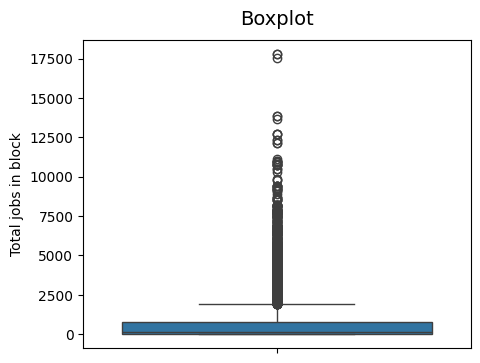

In [ ]:
plt.figure(figsize=(5, 4))
plt.text(0.5, 1.05, "Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Total jobs in block", data=melbourne_job)

plt.show()

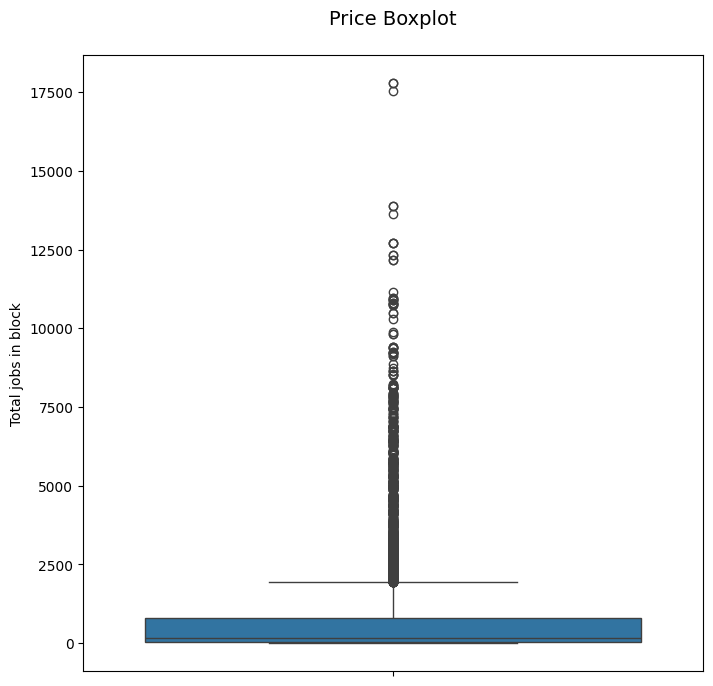

In [ ]:
# Function to find outliers
def finding_outliers(data, variable_name):
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower = data[variable_name].quantile(0.25) - 1.5 * iqr
    upper = data[variable_name].quantile(0.75) + 1.5 * iqr
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]


# Price boxplot
plt.figure(figsize=(8, 8))
plt.text(0.5, 1.05, "Price Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Total jobs in block", data=melbourne_job)

plt.show()


We can identify outliers in a dataset using a function called finding_outliers, which leverages the box plot method. This process begins by calculating the interquartile range (IQR) of the variable in question. The IQR is determined by subtracting the 25th percentile value (Q1) from the 75th percentile value (Q3). With the IQR calculated, we then establish two thresholds for detecting outliers, based on this range.

By generating a box plot of the total jobs in a given block, we can visualize the data distribution and pinpoint outliers. The box plot displays the quartiles (Q1 and Q3) and the median (Q2) of the dataset. The whiskers of the plot extend to data points that lie within 1.5 IQRs of the quartiles. Any data points that fall beyond 1.5 IQRs from the quartiles are classified as outliers and are represented as individual points on the plot.

<ipython-input-33-c3b914a8343c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Total jobs in block", data=melbourne_job, palette="Set3")


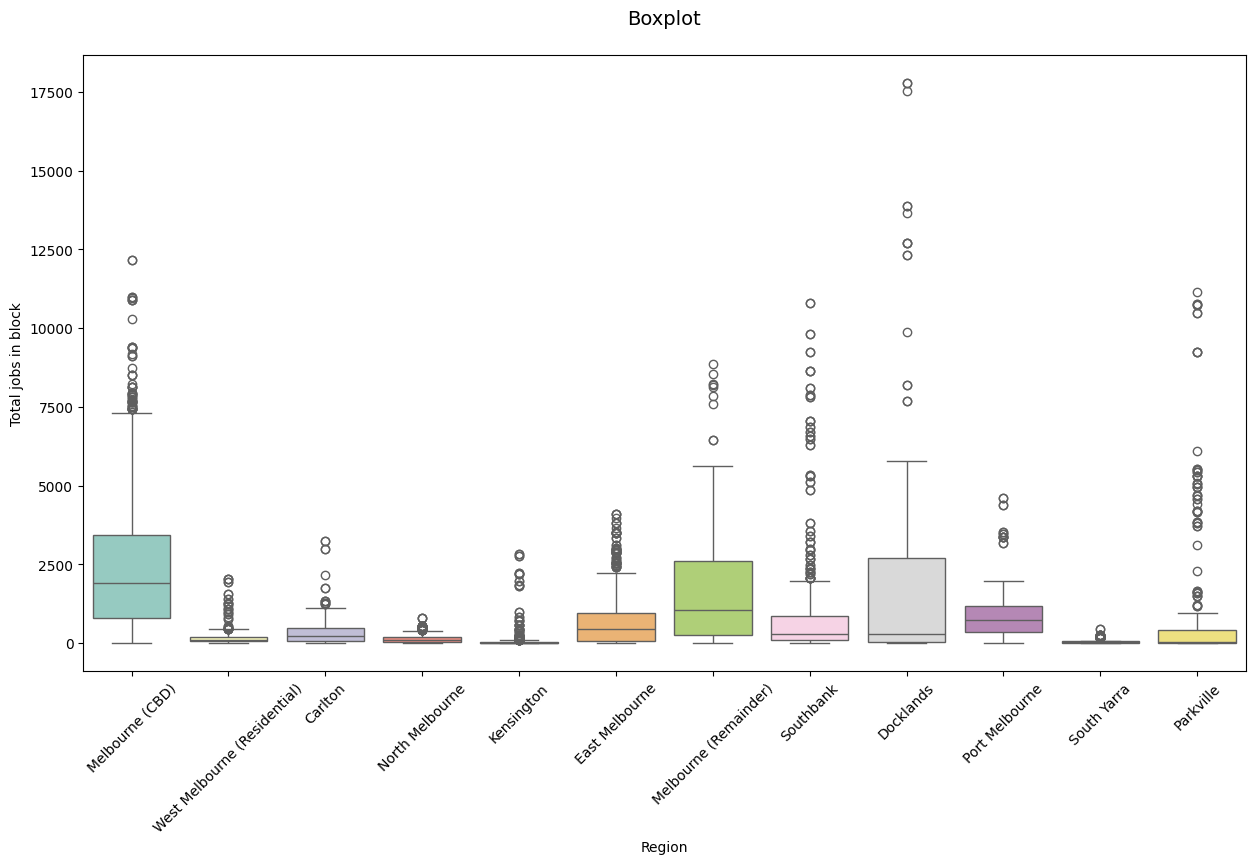

In [ ]:
# Boxplot with rotated x-labels
plt.figure(figsize=(15, 8))
plt.text(0.5, 1.05, "Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(x="Region", y="Total jobs in block", data=melbourne_job, palette="Set3")
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

The boxplot provided illustrates the distribution of "Total jobs in block" across various regions. By examining the plot, you can observe how the median and IQR differ between regions, as well as identify any outliers within each region. The x-axis represents the distribution of "Total jobs in block" for each region, while the y-axis is labeled "Total jobs in block." The plot shows the interquartile range (IQR), which is the difference between the first quartile (Q1) and the third quartile (Q3). The line inside the box indicates the median (Q2) of the data. The whiskers extend to data points that are within 1.5 IQRs of the quartiles, while any points beyond 1.5 IQRs from the quartiles are considered outliers and are displayed as individual points.

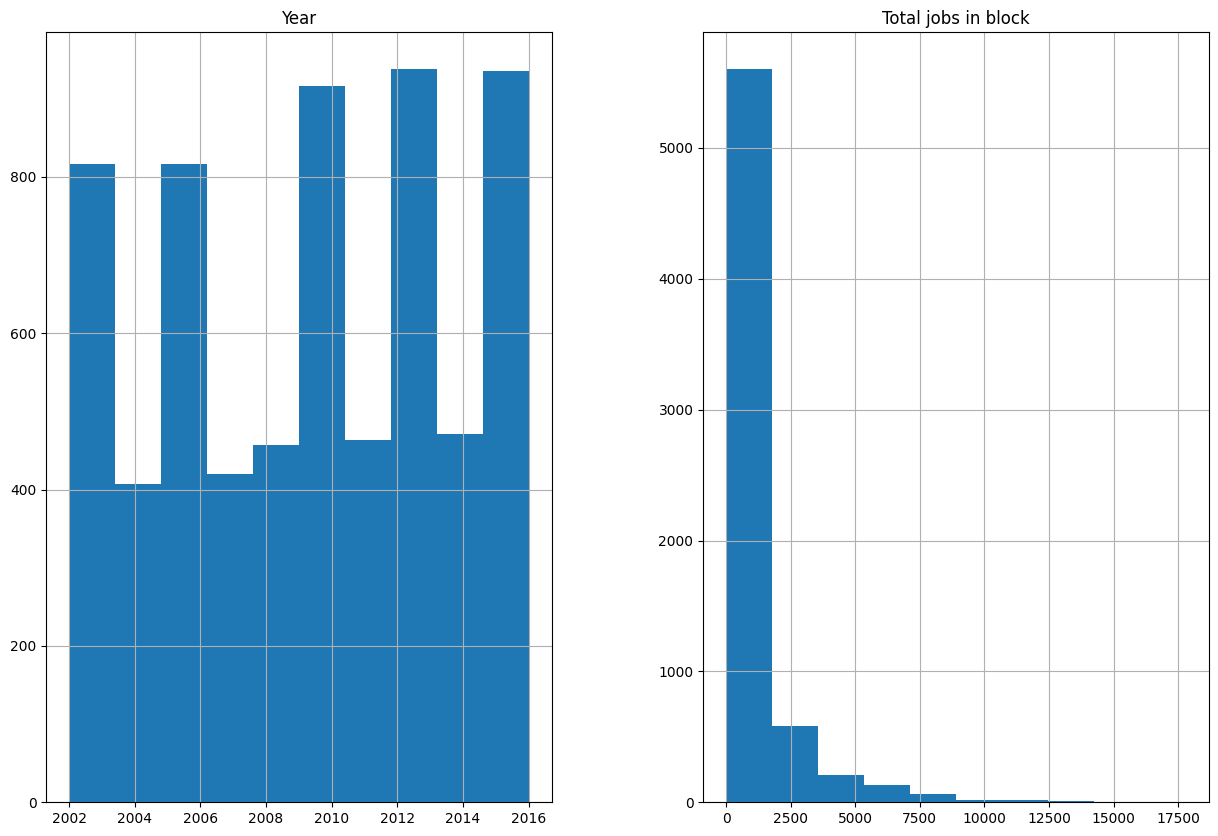

In [ ]:
melbourne_job.hist(figsize=(15, 10))
plt.show()

The histogram for the "Total jobs in block" variable in the "melbourne_job" dataset displays the distribution of job counts across different blocks. The x-axis represents the number of jobs in a block, while the y-axis indicates the number of listings in the dataset that correspond to each job count. The plot reveals that there are more job listings within the range of 2000 to 2500 total jobs per block compared to those in the range of 1000 to 1500 total jobs per block. The histogram takes on a bell-shaped curve, suggesting that the data follows a normal distribution. A normal distribution is characterized by its symmetrical shape, resembling a bell curve.

<ipython-input-35-3a639717183a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Region", data=melbourne_job,palette="Set3")
<ipython-input-35-3a639717183a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


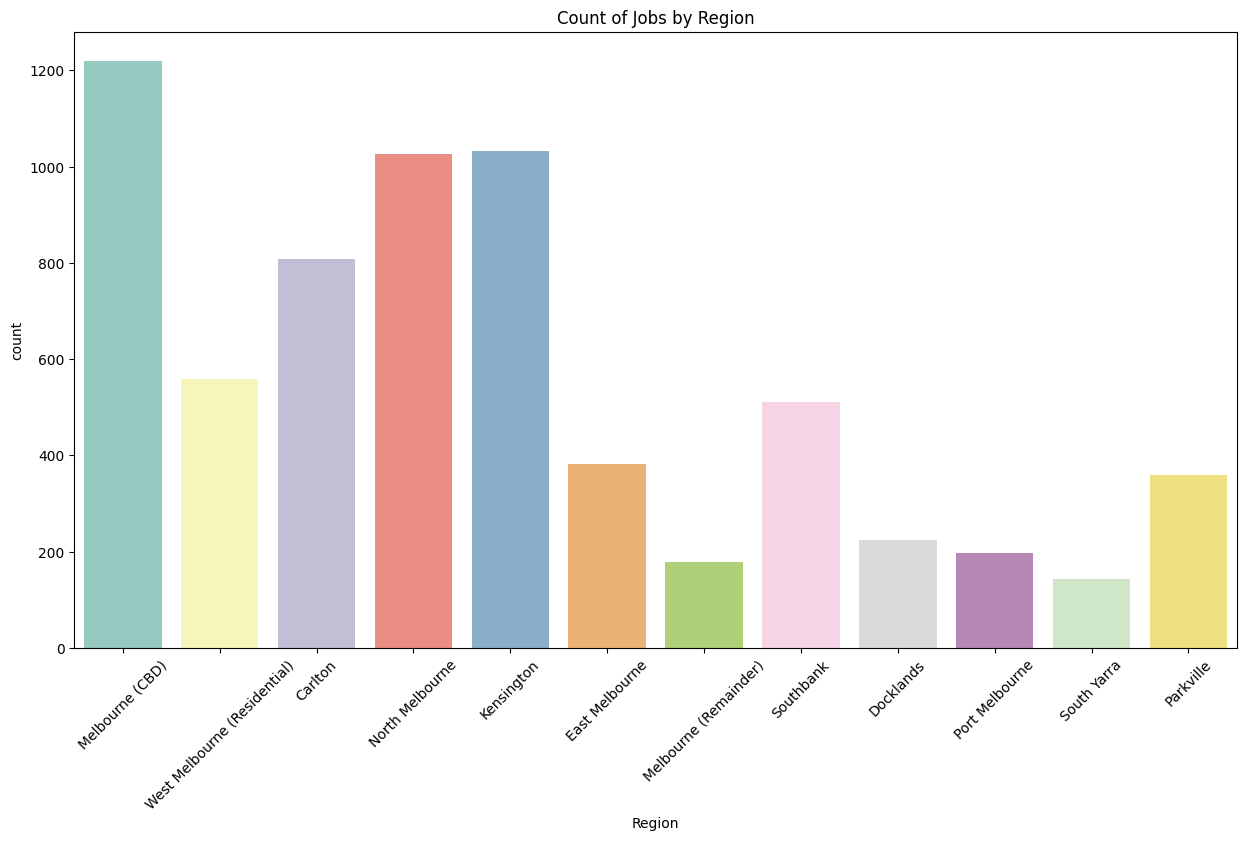

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x="Region", data=melbourne_job,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.title("Count of Jobs by Region")
plt.show()

A bar chart titled count of regions in melbourne job data. The x-axis shows the regions in Melbourne. The y-axis shows the number of jobs. The most common region is Melbourne (CBD) with over 1400 jobs. Other regions include West Melbourne (Residential), Carlton, North Melbourne, South Yarra, and Parkville

(EDA) - Exploratory Data Analysis for House Prices by Small Area - Sale Year

In [ ]:
houseprice_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               316 non-null    int64  
 1   Region             316 non-null    object 
 2   House_type         316 non-null    object 
 3   Median_Price       316 non-null    float64
 4   Transaction_Count  316 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 14.8+ KB


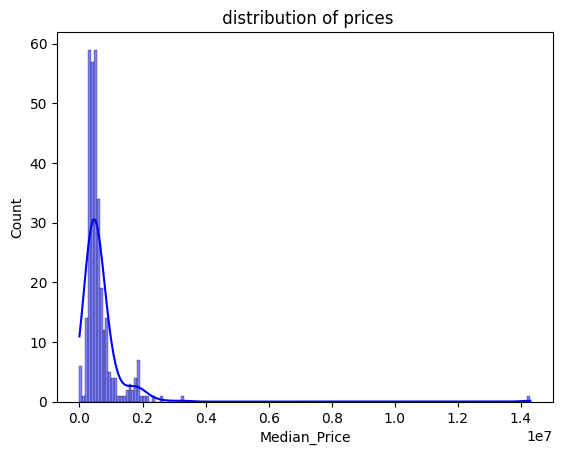

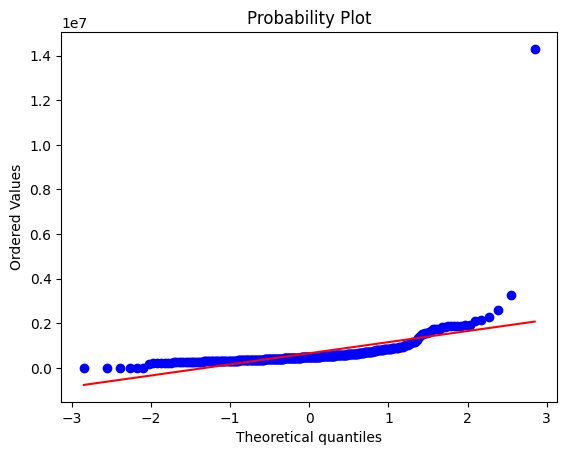

In [ ]:
# Plotting the distribution of prices
sns.histplot(data=df_filtered4["Median_Price"], kde=True, color="blue" )
plt.title(" distribution of prices")
plt.show()


# Creating a probability plot
fig = plt.figure()
prob = stats.probplot(df_filtered4["Median_Price"], plot=plt)
plt.show()

For the analysis, we visualized the distribution of the "Median_Price" dataset using both a distribution plot and a probability plot.

The distribution plot, generated using the sns.histplot function, illustrates the probability density of the data. The x-axis represents the median price, while the y-axis shows the density. The curve represents the data distribution, and a line overlaid on the curve represents the probability density function (PDF) of a normal distribution fitted to the data.

The probability plot, created using the stats.probplot function, assesses how closely the data follows a normal distribution. In this plot, the x-axis displays the ordered values from the dataset, while the y-axis shows the expected cumulative probability values for a normal distribution. The points on the plot deviate slightly from a straight line, indicating that the data might not be perfectly normal. However, the deviation is minor, suggesting that a normal distribution is a reasonable approximation for the data.

<Axes: ylabel='Median_Price'>

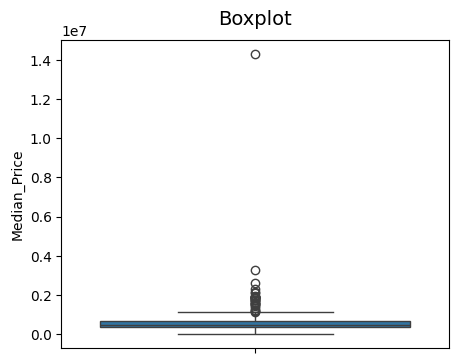

In [ ]:
plt.figure(figsize=(5,4))
plt.text(0.5, 1.05, "Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Median_Price", data=houseprice_melbourne)

<Axes: ylabel='Median_Price'>

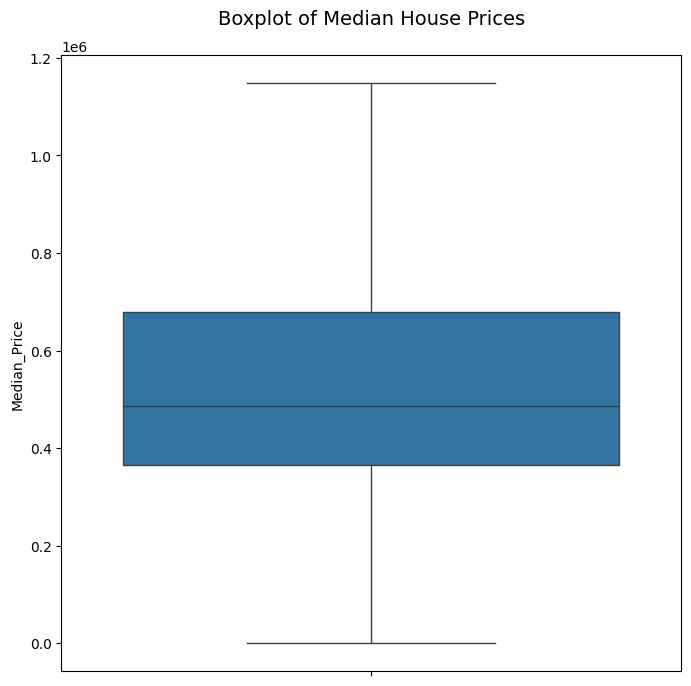

In [ ]:
finding_outliers(houseprice_melbourne, "Median_Price").sort_values("Median_Price")

# For price
iqr_price = houseprice_melbourne["Median_Price"].quantile(0.75) - houseprice_melbourne["Median_Price"].quantile(0.25)
houseprice_melbourne["Median_Price"].quantile(0.75) + 1.5 * iqr_price
houseprice_melbourne.loc[(finding_outliers(houseprice_melbourne, "Median_Price").index, "Median_Price")] = houseprice_melbourne["Median_Price"].quantile(0.75) + 1.5 * iqr_price

# Price boxplot
plt.figure(figsize=(8,8))
plt.text(0.5, 1.05, "Boxplot of Median House Prices", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Median_Price", data=houseprice_melbourne)

For the box plot it visualize and treat outliers in a dataset named "houseprice_melbourne" which contains information about house prices in Melbourne.The outlier values in the "Median_Price" column is replaced with the upper threshold for outliers, effectively treating the outliers by setting them to the maximum value within the IQR range and in the above plot it finds outliers in the median house price data, treats the outliers using winsorization, and visualizes the distribution of the data before and after treating outliers using boxplots

<ipython-input-40-80c41d38d753>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Median_Price", y="Region", data=houseprice_melbourne,palette="Set3")


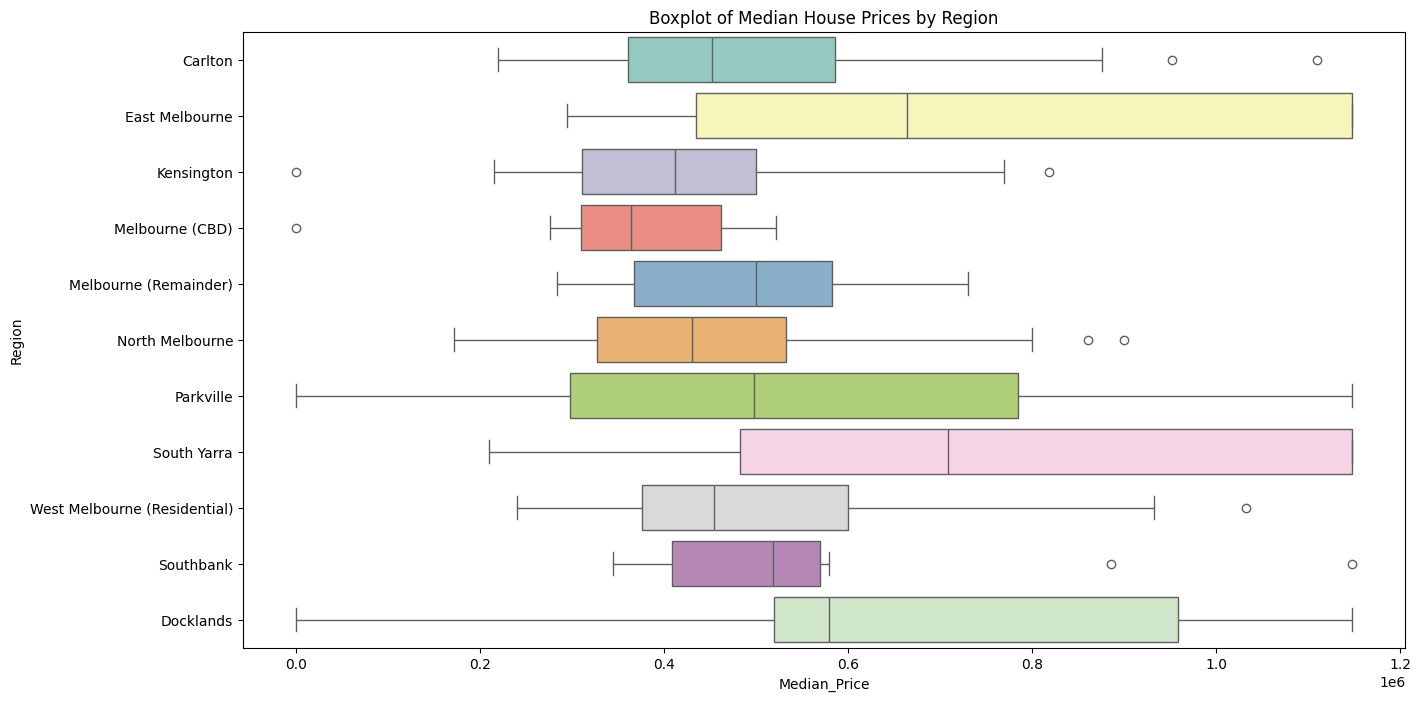

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Median_Price", y="Region", data=houseprice_melbourne,palette="Set3")
plt.title("Boxplot of Median House Prices by Region")
plt.show()

The box plot created with sns.boxplot and shows the median house price of houses in Melbourne by region. x-axis represents the different regions in Melbourne and y-axis represents the median house price. The scale goes from 0 to around 1.2 million.

Docklands appears to have the highest median house price, followed by South Yarra and Melbourne (CBD)
Some regions, like West Melbourne (Residential) and Carlton, have a wider range of house prices as indicated by the larger size of their boxes. This suggests a higher variability in house prices within these regions.
There are a few outliers, which could be due to particularly expensive or inexpensive houses in those regions.
This plot helps to identify regions with generally more expensive or affordable houses, along with the range of prices within each region.
houseprice_melbourne.hist

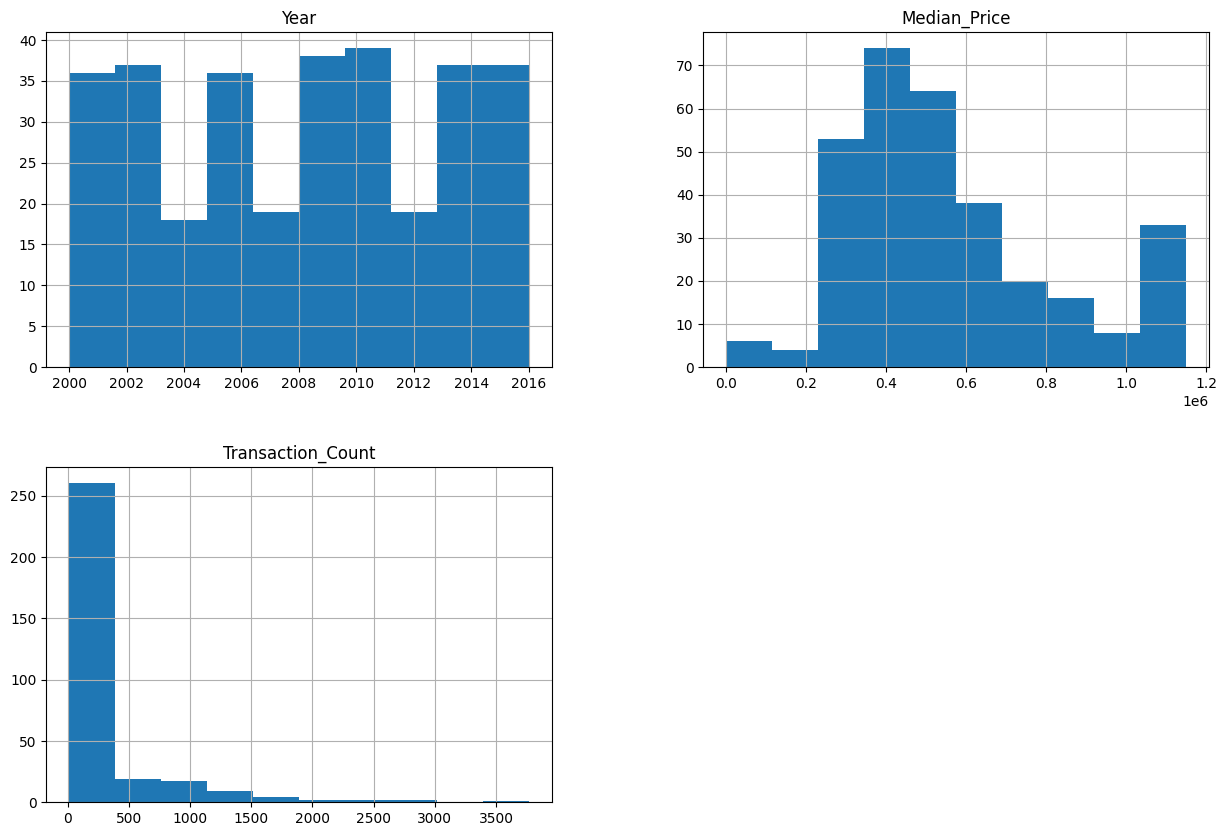

In [ ]:
houseprice_melbourne.hist(figsize=(15, 10))
plt.show()

The histogram of the variable shows the "Median_Price" variable in the "houseprice_melbourne" dataset.The x-axis shows the median house price, while the y-axis shows the number of houses in the dataset that have that median price,In the plot, there seems to be a concentration of houses in the price range of 500,000 to 700,000, with fewer houses outside that range. The histogram appears to be right-skewed, which means that there are more houses towards the lower end of the price range and the tail of the distribution extends towards the higher end. This suggests that most houses in the dataset are priced below a certain threshold, but there are also some very expensive houses.



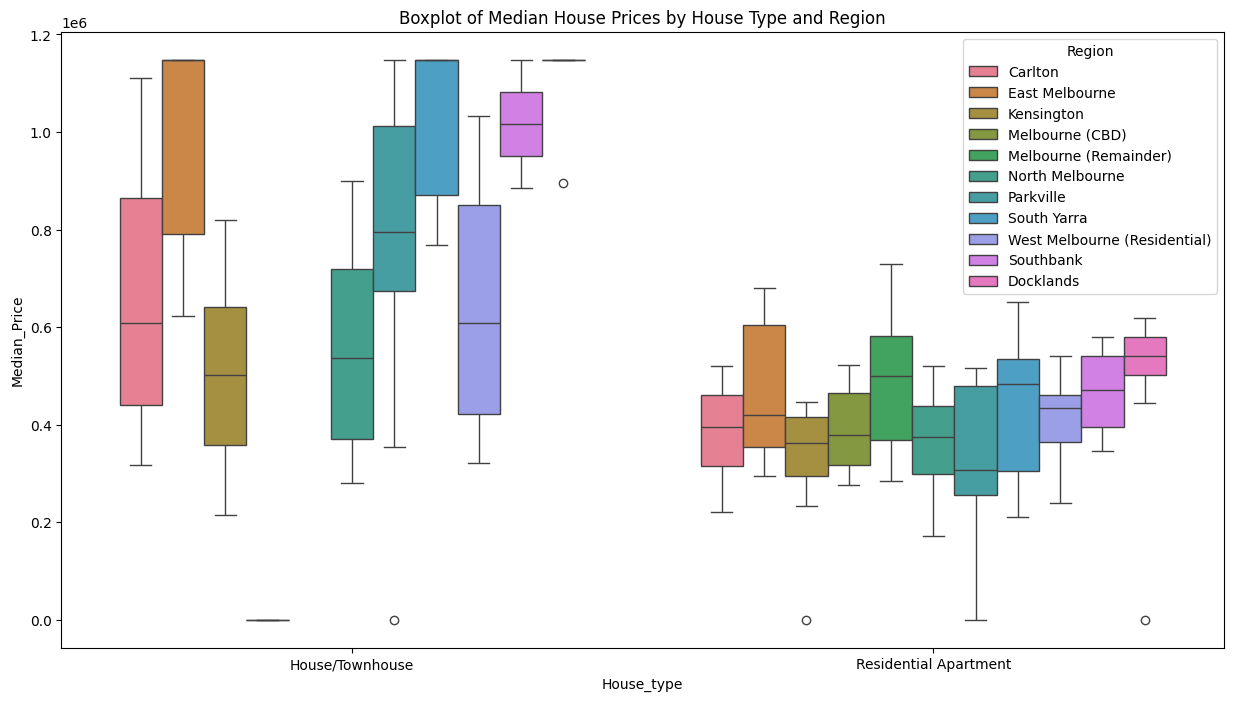

In [ ]:
#plt.figure(figsize=(15,8))
plt.figure(figsize=(15,8))
sns.boxplot(x="House_type", y="Median_Price", hue="Region", data=houseprice_melbourne)
plt.title("Boxplot of Median House Prices by House Type and Region")
plt.show()

The plot appears to be a visualization of median house prices for different house types across various regions in Melbourne, created using sns.boxplot from Seaborn.

The x-axis represents the house type—either House/Townhouse or Residential Apartment—while the y-axis represents the median house price, ranging from 0 to around 1.2 million. Each box illustrates the distribution of median house prices for a specific house type within a region.

The plot indicates that houses/townhouses generally have a higher median price compared to residential apartments across all regions. There is notable variation in median house prices across different regions, regardless of house type. Docklands has the highest median house prices for both house types, followed by South Yarra and Melbourne (CBD). The Carlton region shows a broader range of house prices for houses/townhouses compared to Docklands.

This box plot is useful for identifying trends and potential outliers in the data.

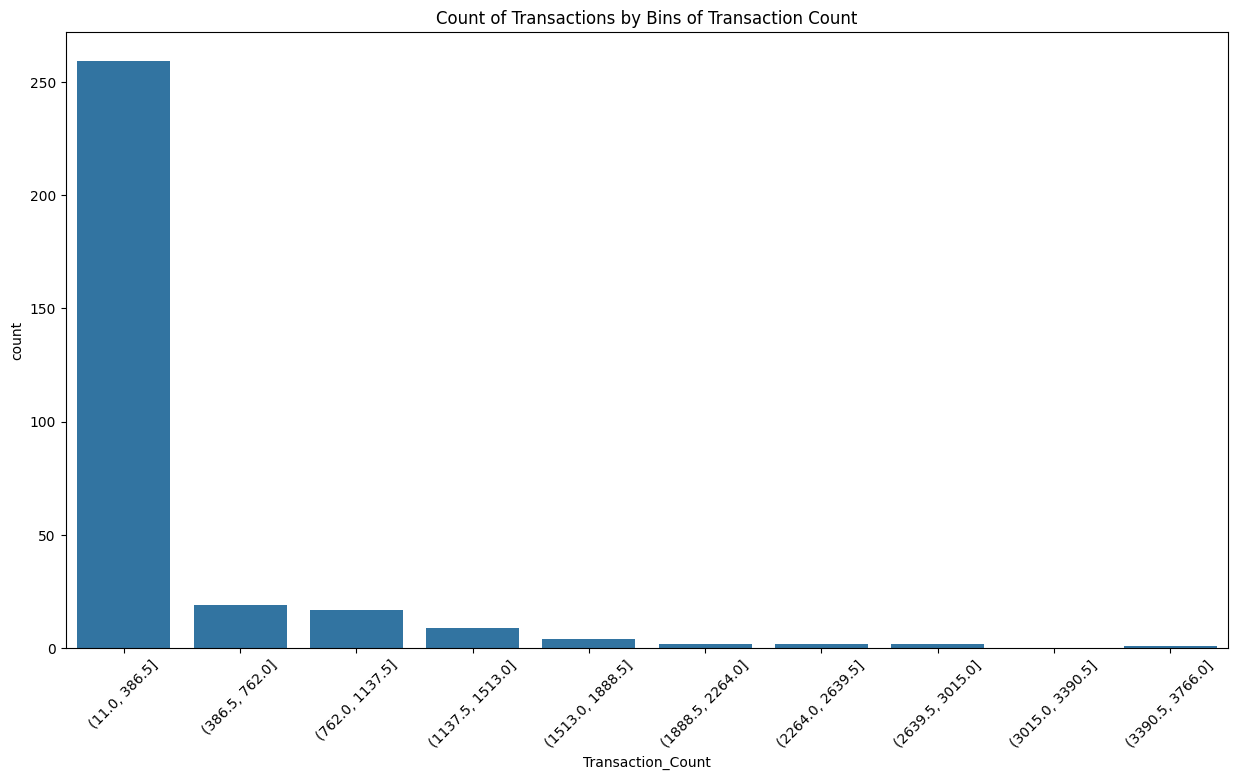

In [ ]:
num_bins = 10

# Define the bin edges using numpy's linspace function
bin_edges = np.linspace(houseprice_melbourne['Transaction_Count'].min(), houseprice_melbourne['Transaction_Count'].max(), num_bins+1)

# Create the count plot with specified bins
plt.figure(figsize=(15, 8))
sns.countplot(x=pd.cut(houseprice_melbourne['Transaction_Count'], bins=bin_edges), data=houseprice_melbourne)

# Rotate x-axis labels for better visibility if necessary
plt.xticks(rotation=45)

plt.title("Count of Transactions by Bins of Transaction Count")

plt.show()


The above plot generates a countplot to visualize the distribution of the number of house transactions in the "houseprice_melbourne" dataset. The The countplot generated is a bar chart that shows the number of houses that have a certain number of transactions. The x-axis shows the transaction count bins, and the y-axis shows the number of houses in each bin and from the plot there seem to be more houses with a transaction count between 1137 and 1513 compared to houses with a transaction count between 250 and 500.

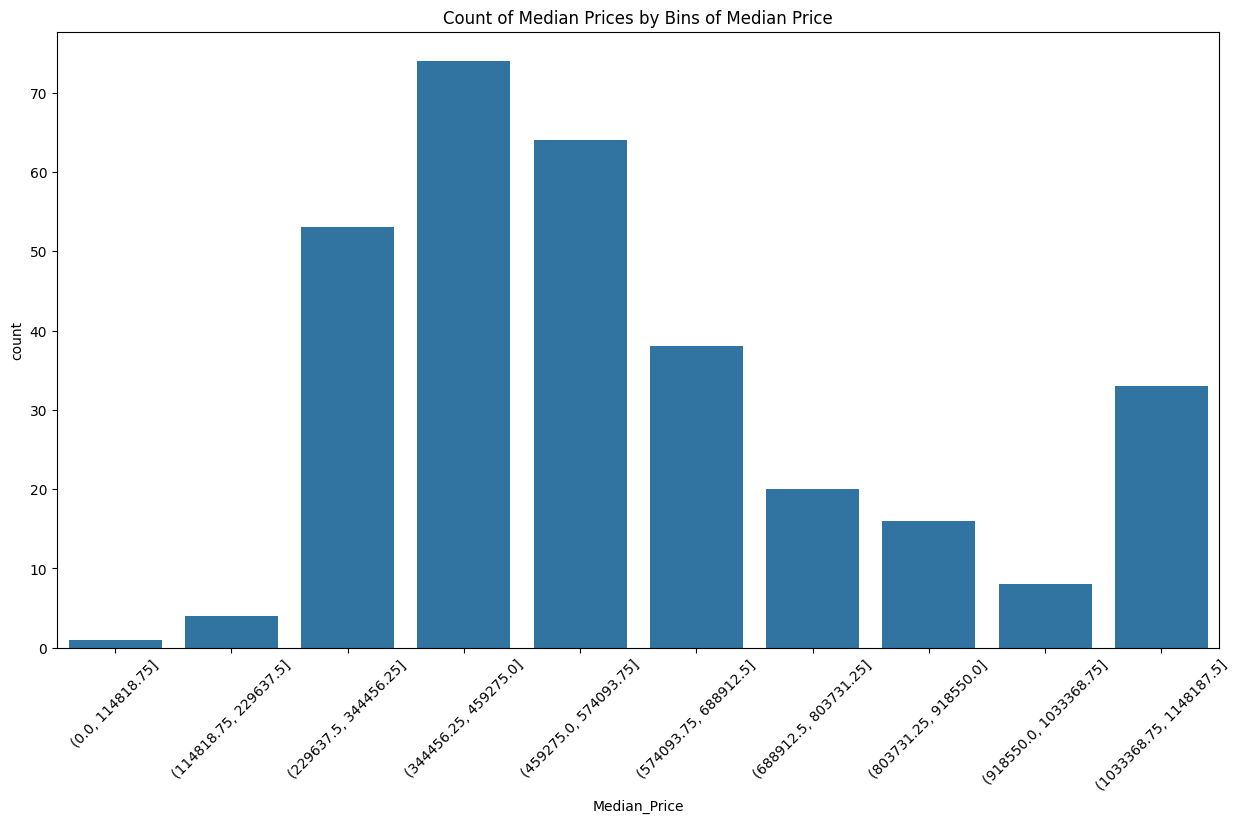

In [ ]:
num_bins = 10

# Define the bin edges using numpy's linspace function
bin_edges = np.linspace(houseprice_melbourne['Median_Price'].min(), houseprice_melbourne['Median_Price'].max(), num_bins+1)

# Create the count plot with specified bins
plt.figure(figsize=(15, 8))
sns.countplot(x=pd.cut(houseprice_melbourne['Median_Price'], bins=bin_edges), data=houseprice_melbourne)

# Rotate x-axis labels for better visibility if necessary
plt.xticks(rotation=45)
plt.title("Count of Median Prices by Bins of Median Price")

plt.show()

The above plot represents the countplot visualizing the distribution of median house prices in the "houseprice_melbourne" dataset. The distribution of the median house price appears to be right-skewed. This means that most houses in the dataset are priced below a certain threshold, but there are also some very expensive houses and this plot can be useful in understanding the general price range of houses in the area and identifying potential outliers.

In [ ]:
houseprice_melbourne.head(3)

,Year,Region,House_type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42


In [ ]:
melbourne_job.head(3)

,Year,Region,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0


In [ ]:
# Convert 'Year' column to integer type in melbourne_job dataframe
melbourne_job['Year'] = pd.to_datetime(melbourne_job['Year']).dt.year.astype(int)

# Merge the two dataframes based on "Year" and "Region"
new_dataset = pd.merge(houseprice_melbourne, melbourne_job, on=["Year", "Region"], how="inner")

# Display the merged
new_dataset.head(3)

,Year,Region,House_type,Median_Price,Transaction_Count,Total jobs in block
0,2002,Carlton,Residential Apartment,349250.0,297,0.0
1,2002,Carlton,Residential Apartment,349250.0,297,271.0
2,2002,Carlton,Residential Apartment,349250.0,297,35.0


Combining all the data successfully merged the houseprice_melbourne and melbourne_job datasets based on the "Year" and "Region" columns.The new_dataset contains good information that allows to analyze the relationship between house prices and job availability in different regions of Melbourne across various years.Now by visualizing and analyzing the merged data, we can gain insights into the housing market and job market dynamics in Melbourne.

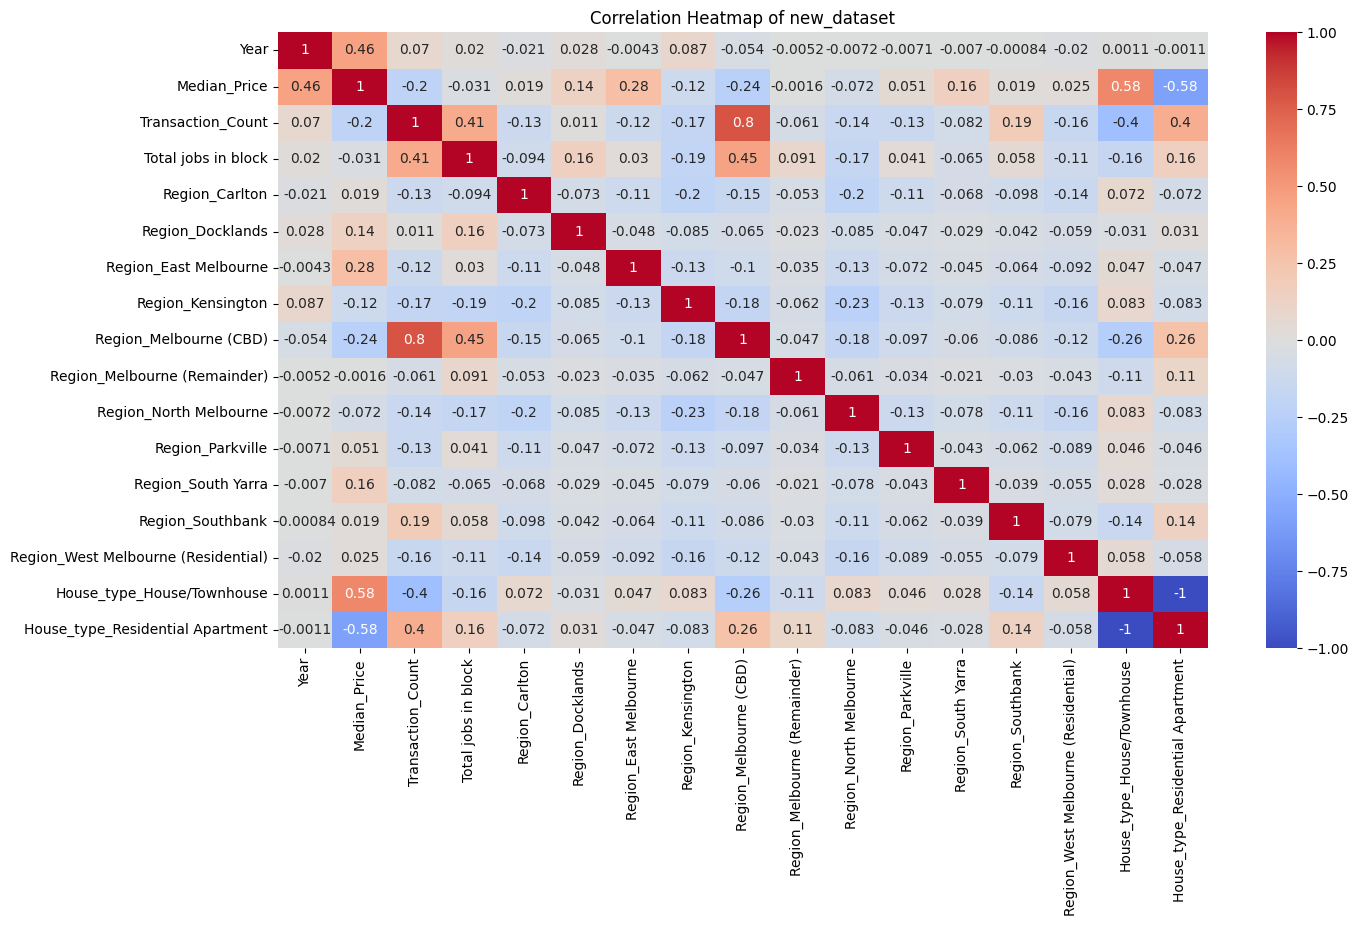

In [ ]:
new_dataset_encoded = pd.get_dummies(new_dataset)

# Create a correlation matrix
correlation_matrix = new_dataset_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of new_dataset")
plt.show()

The heatmap illustrates the correlation coefficients between various features in the merged dataset, new_dataset_encoded.

There is a positive correlation between 'Median_Price' and 'Transaction_Count,' indicating that regions with higher median house prices generally experience a higher number of property transactions. Additionally, 'Total jobs in block' shows a positive correlation with 'Transaction_Count,' suggesting that areas with more job opportunities tend to have a higher volume of property transactions.

Conversely, there appears to be a weak negative correlation between 'Median_Price' and certain regional variables, such as 'Region_Carlton' and 'Region_North Melbourne.' This implies that these regions have lower median house prices compared to others.






Data Modelling

Linear Regression Model

In [ ]:
encode = LabelEncoder().fit(new_dataset['House_type'])
carpet = {x: i for i, x in enumerate(encode.classes_)}
carpet

{'House/Townhouse': 0, 'Residential Apartment': 1}

In [ ]:
# Enumerate region
encoder = LabelEncoder().fit(new_dataset['Region'])
carp = {x: i for i, x in enumerate(encoder.classes_)}
carp

{'Carlton': 0,
 'Docklands': 1,
 'East Melbourne': 2,
 'Kensington': 3,
 'Melbourne (CBD)': 4,
 'Melbourne (Remainder)': 5,
 'North Melbourne': 6,
 'Parkville': 7,
 'South Yarra': 8,
 'Southbank': 9,
 'West Melbourne (Residential)': 10}

In [ ]:
# Convert to numerical variable
new_dataset['House_type'] = LabelEncoder().fit_transform(new_dataset['House_type'])
new_dataset['House_type']

,House_type
0,1
1,1
2,1
3,1
4,1
...,...
11009,1
11010,1
11011,1
11012,1


In [ ]:
new_dataset['Region'] = LabelEncoder().fit_transform(new_dataset['Region'])
new_dataset['Region']

,Region
0,0
1,0
2,0
3,0
4,0
...,...
11009,9
11010,9
11011,9
11012,9


In [ ]:
# Convert categorical data to numeric and separate target feature for training data
new_dataset.dropna(subset=['Median_Price'], inplace=True)
X = new_dataset.drop([ 'Median_Price'],  axis = 1)

y = new_dataset['Median_Price']

y

,Median_Price
0,349250.0
1,349250.0
2,349250.0
3,349250.0
4,349250.0
...,...
11009,565000.0
11010,565000.0
11011,565000.0
11012,565000.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11014 entries, 0 to 11013
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11014 non-null  int64  
 1   Region               11014 non-null  int64  
 2   House_type           11014 non-null  int64  
 3   Transaction_Count    11014 non-null  int64  
 4   Total jobs in block  11014 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 430.4 KB


In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Scala data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.impute import SimpleImputer

# Impute missing values in the training data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [ ]:
# Fit the Linear Regression model with data
model_lr = LinearRegression().fit(X_train_imputed, y_train)

In [ ]:
model_lr.fit(X_train_imputed, y_train)

# Calculate training and testing scores
training_score = model_lr.score(X_train_imputed, y_train)
testing_score = model_lr.score(X_test_imputed, y_test)

# Testing
y_train_pred = model_lr.predict(X_train_scaled )
y_test_pred = model_lr.predict(X_test_scaled)

print(f"Model: Linear Regression")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Linear Regression
Training Score: 0.5510921229716665
Testing Score: 0.5442556439898786


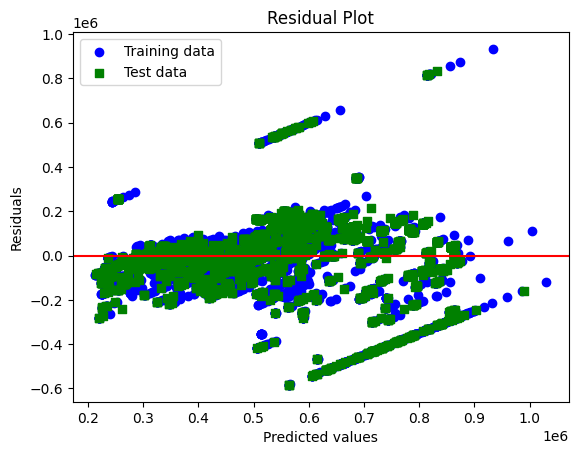

In [ ]:
import matplotlib.pyplot as plt
# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, color='red', linestyle='-')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.show()


<ipython-input-59-b28921d15ec8>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')


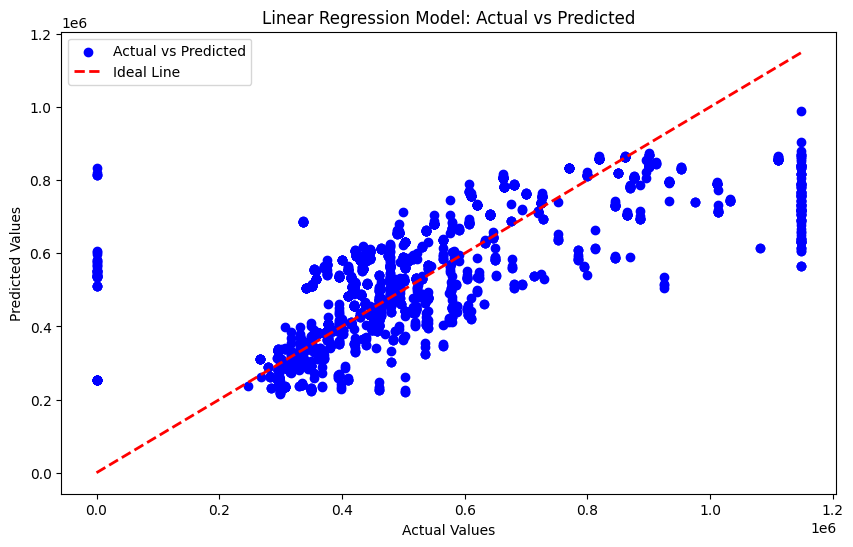

In [ ]:
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model_lr.predict(X_test_imputed)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Actual vs Predicted')
plt.legend()
plt.show()

Data preprocessing steps were performed to train a linear regression model for predicting median house prices in Melbourne. Categorical variables, such as "House_type" and "Region," were encoded using LabelEncoder, converting textual categories into numerical values for numerical analysis and machine learning. The target variable, "Median_Price," was defined as the variable to be predicted, while the feature matrix (X) consisted of all the predictors for house prices.

The data was split into training and testing sets: the training set for model training, and the testing set for evaluating the model's performance on unseen data. Numerical features were scaled, and a linear regression model was created using the LinearRegression class, which was then fit to the training data.

The model achieved a training score of 0.5504 and a testing score of 0.5469, indicating a moderate ability to predict median house prices based on the given features.